### Importing the Libraries



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [36]:
# Loading the Dataaset
adult_data = pd.read_csv('adult.csv')

adult_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [37]:
data

NameError: name 'data' is not defined

### Data Cleaning

In [ ]:
# Checking for missing values
missing_counts = adult_data.isna().sum()

print(missing_counts)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [ ]:
# There are some '?' in some columns. Replacing them with NA
adult_data.replace('?', pd.NA, inplace=True)

In [ ]:
# Checking for missing values
missing_counts = adult_data.isna().sum()

print(missing_counts)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [ ]:
# Removing rows that contain any NA values
adult_data = adult_data.dropna()

In [ ]:
# Checking for missing values
missing_counts = adult_data.isna().sum()

print(missing_counts)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


### Exploratory Data Analysis

In [ ]:
# Get descriptive statistics for all numerical columns
descriptive_stats = adult_data.describe()

print(descriptive_stats)

                age        fnlwgt  education.num  capital.gain  capital.loss   
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000  \
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    30162.000000  
mean        40.931238  
std         11.979984  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
adult_data.to_csv('adult_clean.csv', index=False) 

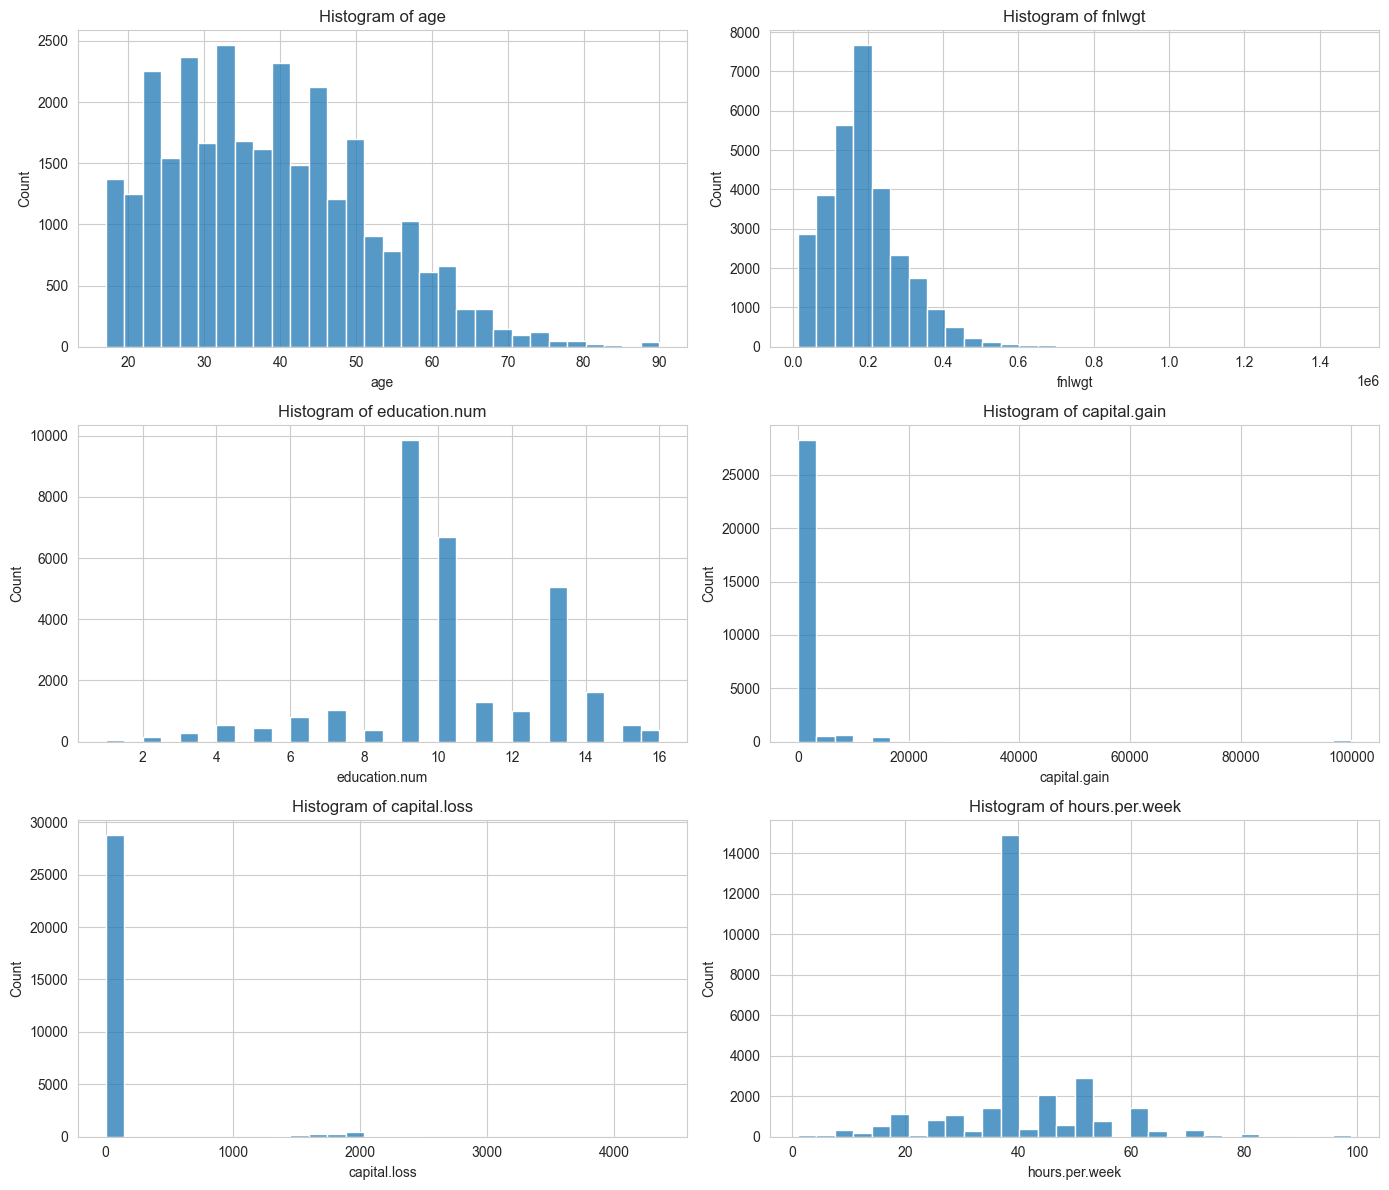

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Histograms for numerical data
fig, ax = plt.subplots(3, 2, figsize=(14, 12))
num_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for i, column in enumerate(num_columns):
    row, col = i // 2, i % 2
    sns.histplot(adult_data[column], bins=30, kde=False, ax=ax[row, col])
    ax[row, col].set_title(f'Histogram of {column}')
plt.tight_layout()

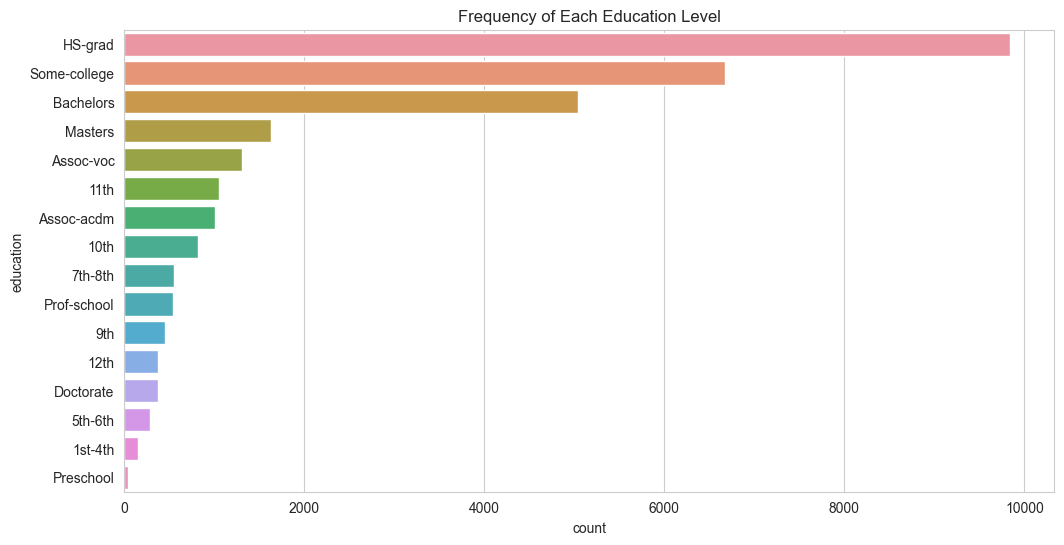

In [ ]:
# Bar chart for categorical data
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=adult_data, order=adult_data['education'].value_counts().index)
plt.title('Frequency of Each Education Level')
plt.show()

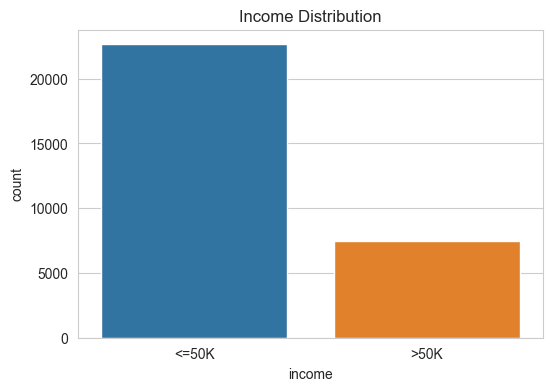

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=adult_data)
plt.title('Income Distribution')
plt.show()

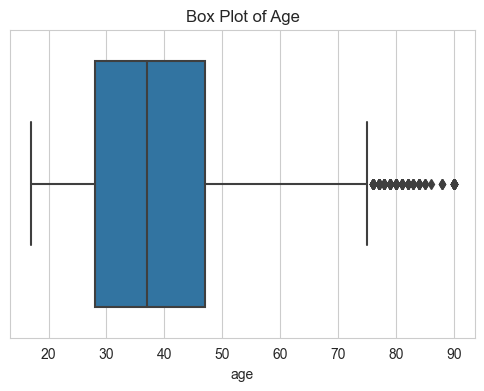

In [ ]:
# Boxplot for age
plt.figure(figsize=(6, 4))
sns.boxplot(x='age', data=adult_data)
plt.title('Box Plot of Age')
plt.show()

### Feature Engineering


In [39]:
# Converting the Target variable to binary
adult_data['income'] = adult_data['income'].map({'>50K': 1, '<=50K': 0})

# Check the first few rows to confirm the changes
print(adult_data['income'].head())

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64


In [41]:
# Defining numerical columns and categorical columns
num_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
cat_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

In [44]:
# Creating a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

# Fitting the preprocessor
adult_data_processed = preprocessor.fit_transform(adult_data)

In [46]:
adult_data_processed

<32561x100 sparse matrix of type '<class 'numpy.float64'>'
	with 421941 stored elements in Compressed Sparse Row format>